## ПОДГОТОВКА

In [2]:
import pandas as pd

In [3]:
covid_data = pd.read_csv('data/covid/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('data/covid/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [5]:
# перейдём от данных по регионам к данным по странам с помощью группировки
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])    # переведём в DateTime

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']    # создадим признак

# введём признаки ежедневной заболеваемости, смертности, выздоравливаемости
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.info())
display(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 86785 entries, 11337 to 17645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             86785 non-null  datetime64[ns]
 1   country          86785 non-null  object        
 2   confirmed        86785 non-null  float64       
 3   deaths           86785 non-null  float64       
 4   recovered        86785 non-null  float64       
 5   active           86785 non-null  float64       
 6   daily_confirmed  86564 non-null  float64       
 7   daily_deaths     86564 non-null  float64       
 8   daily_recovered  86564 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ MB


None

In [7]:
display(covid_data['date'].min())
display(covid_data['date'].max())

display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

covid_df = covid_data.merge(
    vaccinations_data,
    how = 'left',
    on = ['date', 'country']
)
display(covid_df)

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
display(covid_df.shape)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
display(covid_df[covid_df['country'] == 'United States']['death_rate'].max())
display(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean())

(86785, 16)

7.18954248366013

67.06273489477655

In [9]:
display(covid_df[covid_df['country'] == 'United States'])

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
82542,2020-01-22,United States,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
82543,2020-01-23,United States,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
82544,2020-01-24,United States,2.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
82545,2020-01-25,United States,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
82546,2020-01-26,United States,5.0,0.0,0.0,5.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,2021-05-25,United States,33166418.0,590941.0,0.0,32575477.0,22756.0,621.0,0.0,287788872.0,164378258.0,48.87,131078608.0,38.97,1750524.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",1.781745,0.0
83032,2021-05-26,United States,33190470.0,591950.0,0.0,32598520.0,24052.0,1009.0,0.0,289212304.0,165074907.0,49.08,131850089.0,39.20,1703162.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",1.783494,0.0
83033,2021-05-27,United States,33217995.0,593288.0,0.0,32624707.0,27525.0,1338.0,0.0,290724607.0,165718717.0,49.27,132769894.0,39.48,1618194.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",1.786044,0.0
83034,2021-05-28,United States,33239963.0,593963.0,0.0,32646000.0,21968.0,675.0,0.0,292099778.0,166388129.0,49.47,133532544.0,39.70,1500632.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",1.786894,0.0


In [10]:
#covid_df.to_csv('data/covid/covid_df_backup_1.csv')

## БАЗОВАЯ ВИЗУАЛИЗАЦИЯ в PANDAS

### основные параметра метода PLOT()

- x — название признака, который будет отложен по оси абсцисс;
- y — название признака, который будет отложен по оси ординат;
- figsize — размер графика (кортеж из ширины и высоты в дюймах);

- kind —тип визуализации. Основные типы:
     'line' — линейный график (по умолчанию);
    - 'bar' — столбчатая диаграмма;
    - 'barh' — горизонтальная столбчатая диаграмма;
    - 'hist' — гистограмма;
    - 'box' — коробчатая диаграмма (boxplot);
    - 'pie' — круговая диаграмма;
    - 'scatter' — диаграмма рассеяния.

- grid — отображение сетки (по умолчанию False);
- legend — отображение легенды (по умолчанию False);
- title — название графика;
- color — цвет.

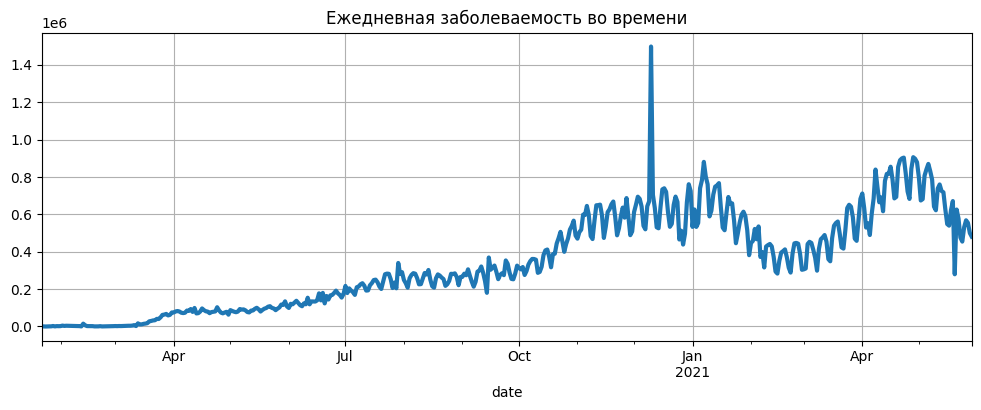

In [11]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(    # не указываем x y т.к. строим график по Series
   kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3    # толщина линии
);    # символ ";" исп-ся во избежание вывода служебной информации

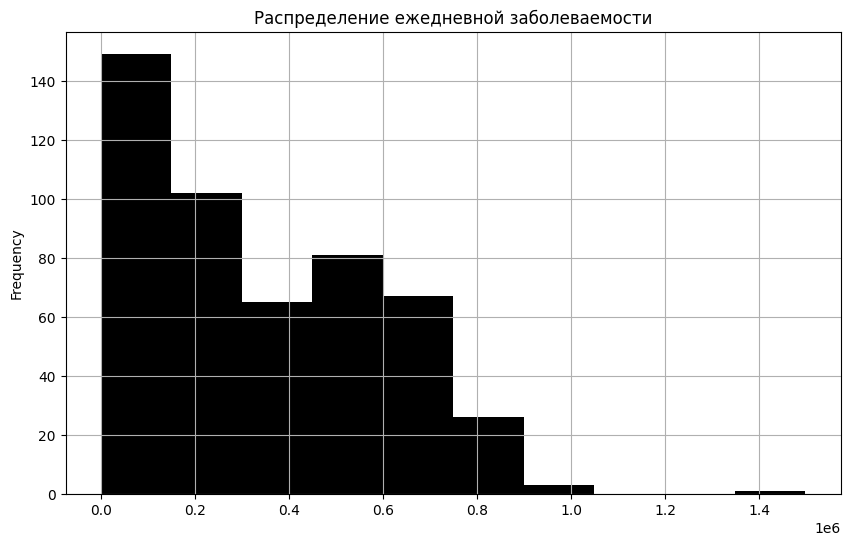

In [12]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10

);

country
Afghanistan                        70111.0
Albania                           132297.0
Algeria                           128456.0
Andorra                            13693.0
Angola                             34180.0
                                    ...   
West Bank and Gaza                307838.0
Yemen                               6731.0
Zambia                             94751.0
Zimbabwe                           38933.0
occupied Palestinian territory         0.0
Name: confirmed, Length: 221, dtype: float64

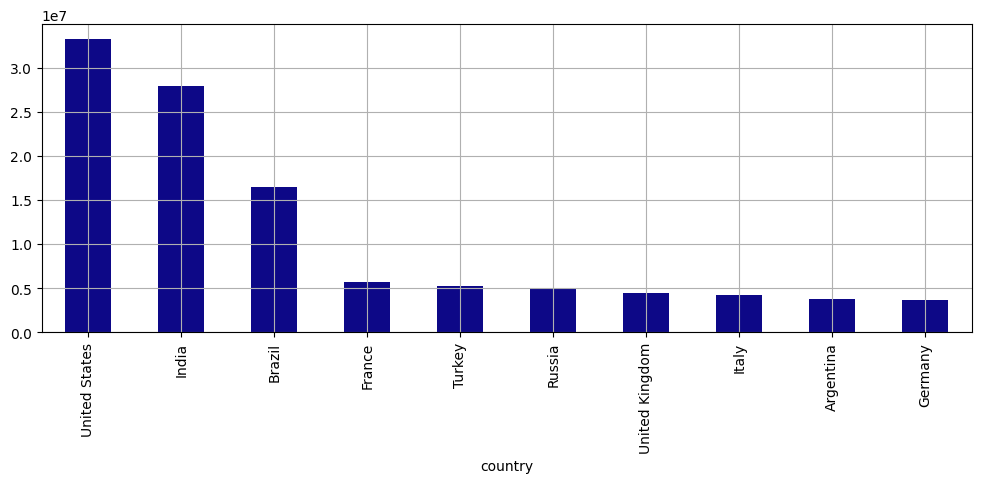

In [13]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
display(grouped_country)
# covid_df[covid_df['country'] == 'Albania'].sort_values('date').iloc[-1, :]
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

,confirmed,deaths
country,,
United States,33251939.0,594306.0
India,27894800.0,325972.0
Brazil,16471600.0,461057.0
France,5719877.0,109518.0
Turkey,5235978.0,47271.0
Russia,4995613.0,118781.0
United Kingdom,4496823.0,128037.0
Italy,4213055.0,126002.0
Argentina,3732263.0,77108.0


,confirmed,deaths
country,,
United States,33251939.0,594306.0
Brazil,16471600.0,461057.0
India,27894800.0,325972.0
United Kingdom,4496823.0,128037.0
Italy,4213055.0,126002.0
Russia,4995613.0,118781.0
France,5719877.0,109518.0
Germany,3684672.0,88413.0
Argentina,3732263.0,77108.0


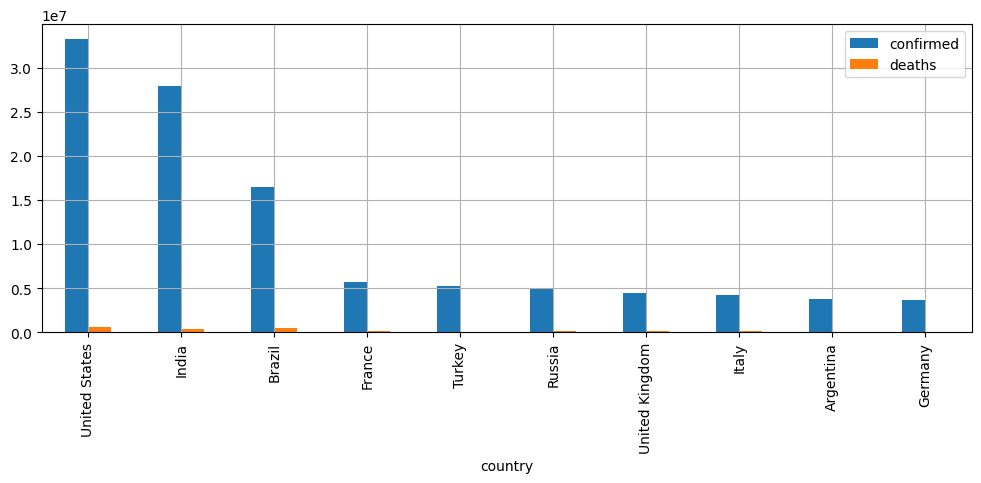

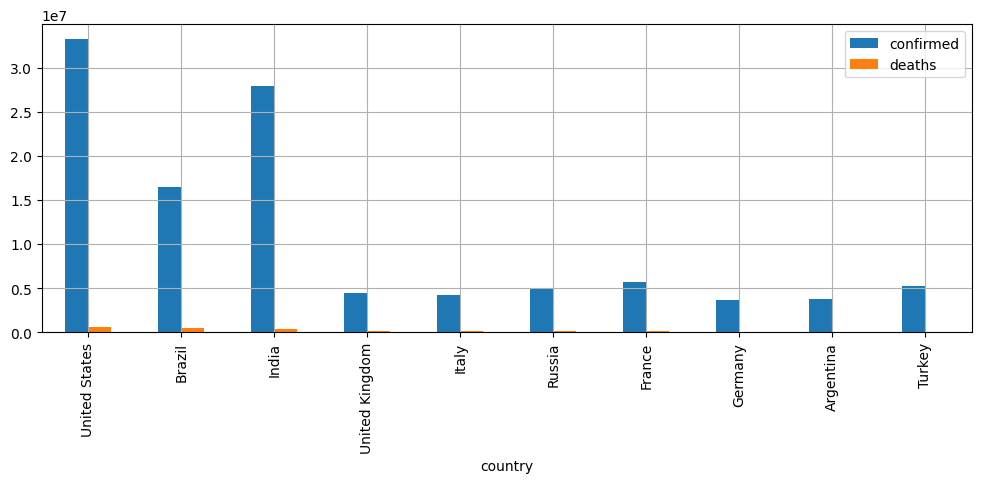

In [14]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
display(grouped_country)
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

alt = grouped_country.nlargest(10, columns=['deaths'])
display(alt)
alt.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

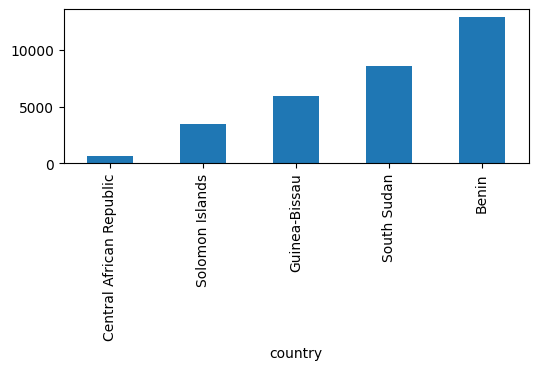

In [15]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar', figsize=(6,2));

## Библиотека MATPLOTLIB

In [16]:
import matplotlib.pyplot as plt    # метод отвечает за визуализацию графиков
    # команда нужна для более корректного отображения графиков:
%matplotlib inline
    # установка стиля отображения графиков для тёмной темы в VS-Code
plt.style.use('default')


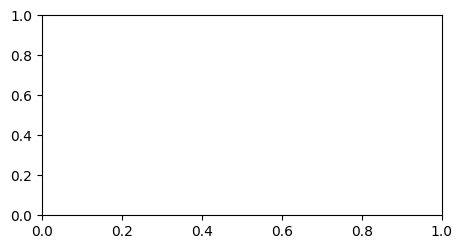

In [17]:
# создаём "фигуру", размер в дюймах
fig = plt.figure(figsize=(8, 4))    
# методом add_axes() добавляем коорд-ю пл-ть (0,0 - положение левого нижнего угла, 1,1 - размер в процентах от фигуры)
axes = fig.add_axes([0, 0, 0.5, 0.5])    

для __ДИАГРАММЫ РАССЕЯНИЯ__ у объекта координатнойй плоскости FIG вызовем метод SCATTER()
### Основные параметры SCATTER()
- x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
- s — размер маркеров;
- marker — вид маркеров ('o' — точки, '^' — треугольники);
- c — цвет маркеров.

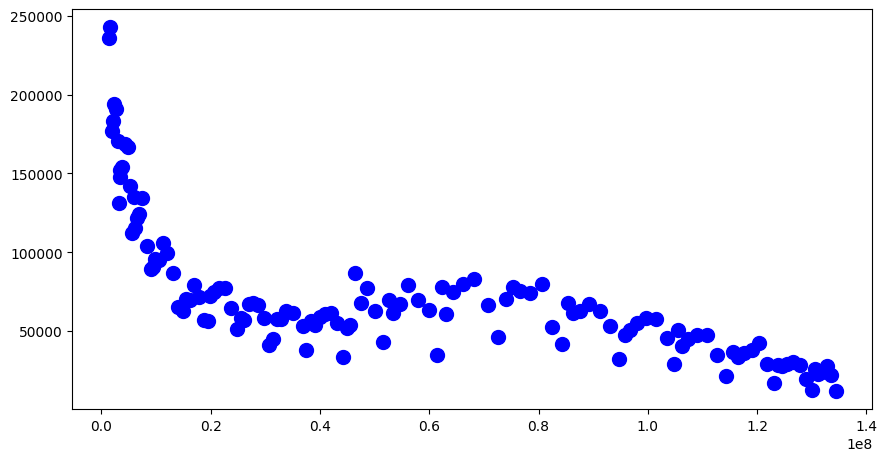

In [18]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
) ;

для __КРУГОВОЙ ДИАГРАММЫ__ у объекта координатной плоскости FIG вызовем метод PIE()
### Основные параметры PIE():
- x — значения, по которым будет строиться круговая диаграмма;
- labels — метки, соответствующие значениям;
autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
- explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x. 

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64

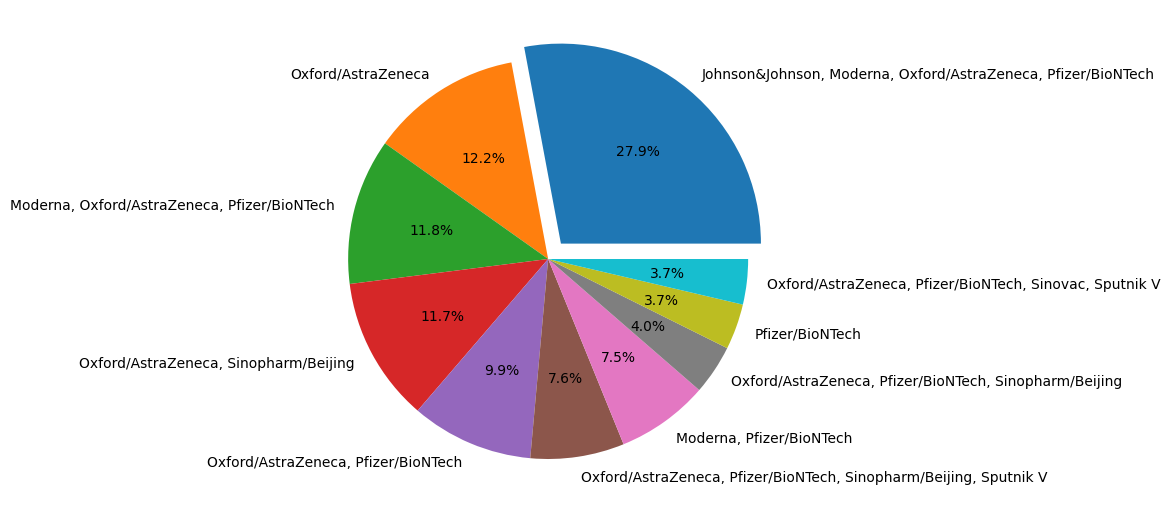

In [19]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
display(vaccine_combinations)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

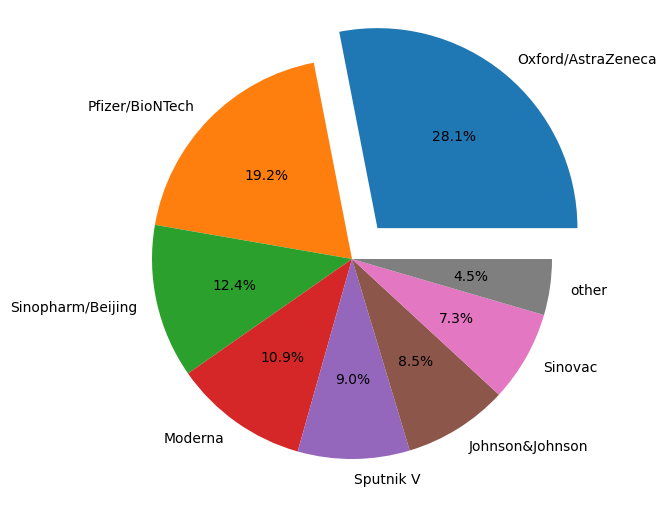

In [20]:
""" Мой вариант:
Делаем Series из последних комбинаций вакцин для каждой страны
Преобразуем комбинации в список вакцин, отсекая пустые значение
Создаём из списка словарь вакцина : количество стран с помощью множества
Преобразуем словарь в Series, оставляя только 7 самых популярных вакцин, остальные суммируем в 'other'
Строим диаграмму
"""

vac_comb = covid_df.groupby('country')['vaccines'].last()

def get_vac_list(combination):
    vac_list = []
    if type(combination) == str:
        vac_list = combination.split(', ')
    return vac_list

temp_list = []
temp_list.extend(vac_comb.apply(get_vac_list))    # здесь получается "грязный" список списков
all_vac = []
for elem in temp_list:    # избавляемся от пустых списков и формируем "чистый" удиный список
    if elem:
        all_vac.extend(elem)
        
vac_dict = {}
for elem in set(all_vac):
    vac_dict[elem] = all_vac.count(elem)
        
vaccines = pd.Series(vac_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

fig = plt.figure(figsize = (5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode = [0.2, 0, 0, 0, 0, 0, 0, 0]
);


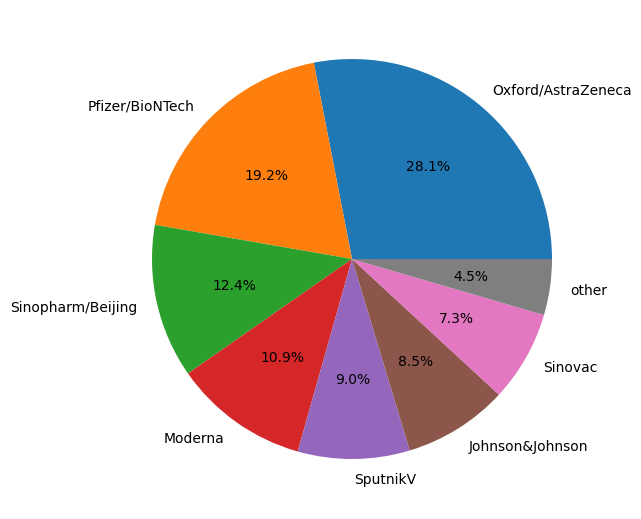

In [21]:
""" Эталонный вариант из модуля """

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

### Добавление информативности в график

- axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
- axes.set_xlabel() — название оси абсцисс;
- axes.set_ylabel() — название оси ординат;
- axes.set_xticks() — установка отметок на оси абсцисс;
- axes.set_yticks() — установка отметок на оси ординат;
- axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
- axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
- axes.legend() — отображение легенды;
- axes.grid() — установка сетки.

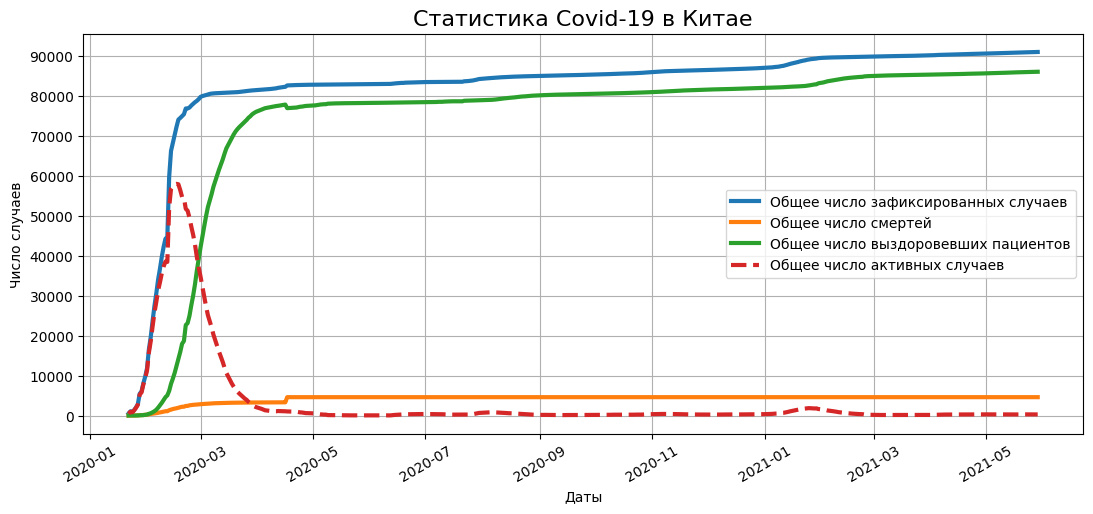

In [22]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

построеиие __СТОЛБЧАТОЙ ДИАГРАММЫ__ с помощью метода BAR()
### Основные параметры BAR()

- x — названия категорий, которые будут располагаться по оси абсцисс;
- height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
- width — ширина столбцов диаграммы;
- color — цвет

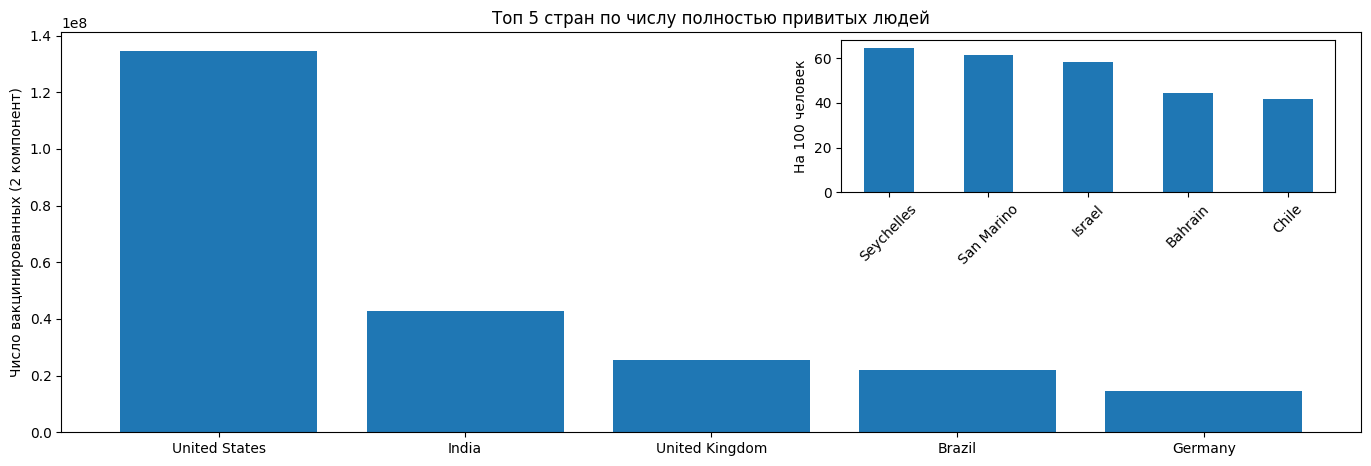

In [23]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

метод SUBPLOTS() для построение нескольких систем коотдинат
### Основные параметры SUBPLOTS():

- nrows — число строк;
- ncols — число столбцов;
- figsize — общий размер фигуры в дюймах (ширина и высота)

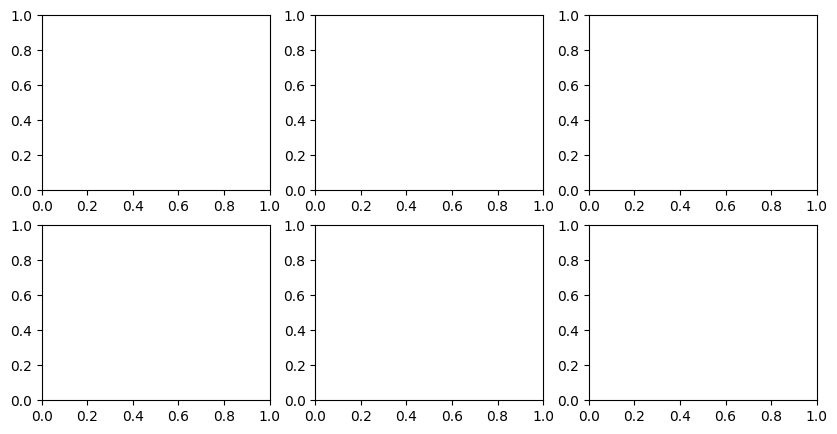

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

### Основные параметры метода HIST():

- x — массив чисел, для которого строится гистограмма;
- bins — число столбцов (корзин);
- orientation — ориентация гистограммы (по умолчанию 'vertical');
- color — цвет

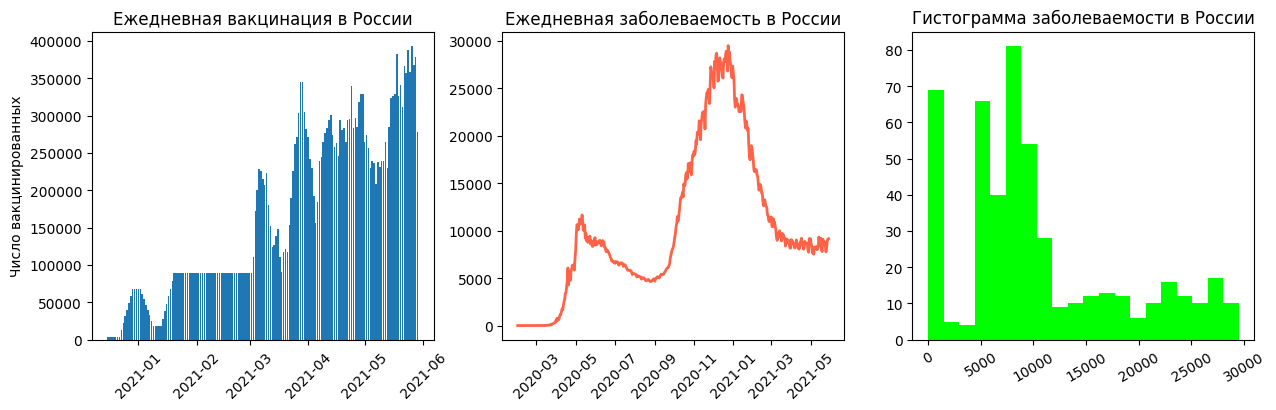

In [25]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_ylabel('Число вакцинированных')
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

### МОДУЛЬНЫЙ ПОДХОД в Matplotlib

не требует создания фигур и плоскостей, обращение к PLT идёт напрямую

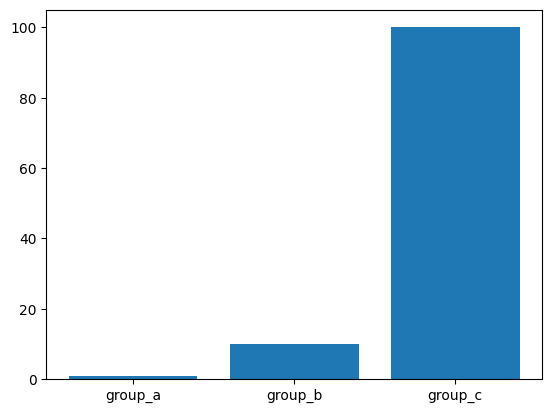

In [26]:
### просто передадим два списка в PLT

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

## Библиотека SEABORN

__SEABORN__ - надстройка для Matplotlib

In [27]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [28]:
# Создадим таблицу с населением, объединим по стране и рассчитаем ежедневную заболеваемость на 100 человек

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


построение __ГИСТОГРАММЫ__ с помошью метода HISTPLOT()

### Основные параметры HISTPLOT():

- data — DataFrame, по которому строится график;
- x — признак, который будет отложен по оси абсцисс;
- y — признак, который будет отложен по оси ординат;
- hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
- ax — система координат Matplotlib, в которой строится график;
- color — цвет графика;
- bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
- kde — параметр, указывающий, стоит ли сглаживать гистограмму криво

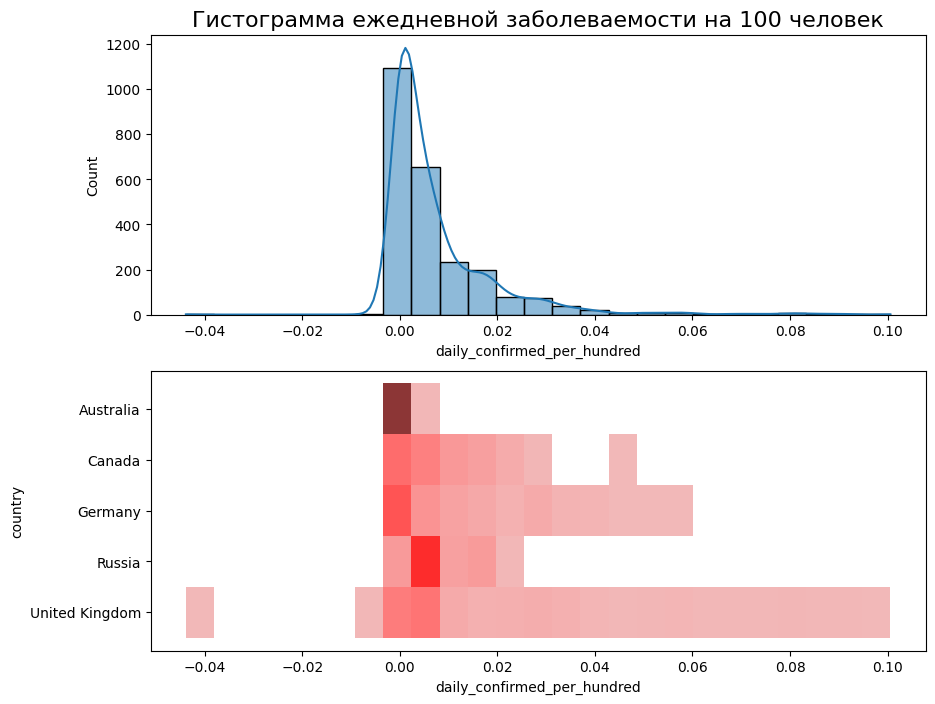

In [29]:
# создаём две координатные плоскости с помощью метода SUBPLOTS()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# строим первую гистограмму - ежедневная заболеваемость на 100 человек
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

# строим вторую - она же в разрезе стран
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

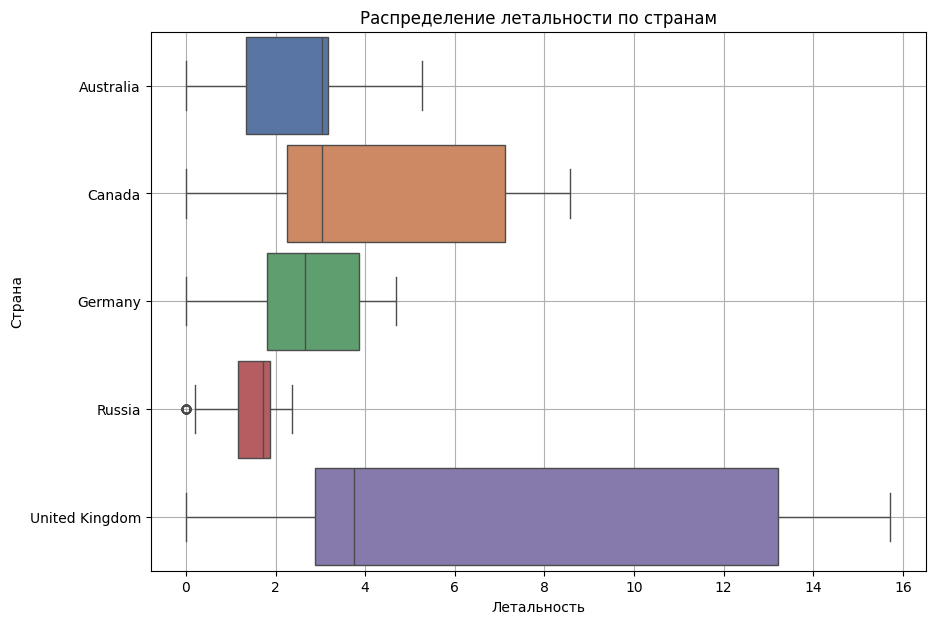

In [31]:
# Если график поместить в переменную, ф-ии настройки модно применять напрямую к ней, а не к коор-й плоскости

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9,
    hue = 'country',
    palette = 'deep'
);
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()